In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

from utils import *

## Supply and Demand

In [77]:
data_URL = 'https://www.ssb.no/statbank/sq/10085910'

data = import_salmon_data(data_URL)

display(data)

date_series = pd.to_datetime(data['uke'].str[:4] + data['uke'].str[-2:] + '1', format='%Y%W%w')
data.set_index(date_series, inplace=True)
data.drop(['uke'], axis=1, inplace=True)

display(data)

,uke,Kilopris (kr),Vekt (tonn)
0,2000U01,30.98,3728
1,2000U02,31.12,4054
2,2000U03,31.03,4043
3,2000U04,30.95,3730
4,2000U05,31.30,3831
...,...,...,...
1228,2023U29,92.67,17898
1229,2023U30,86.14,19604
1230,2023U31,83.28,20469
1231,2023U32,80.26,21060


,Kilopris (kr),Vekt (tonn)
uke,,
2000-01-03,30.98,3728
2000-01-10,31.12,4054
2000-01-17,31.03,4043
2000-01-24,30.95,3730
2000-01-31,31.30,3831
...,...,...
2023-07-17,92.67,17898
2023-07-24,86.14,19604
2023-07-31,83.28,20469


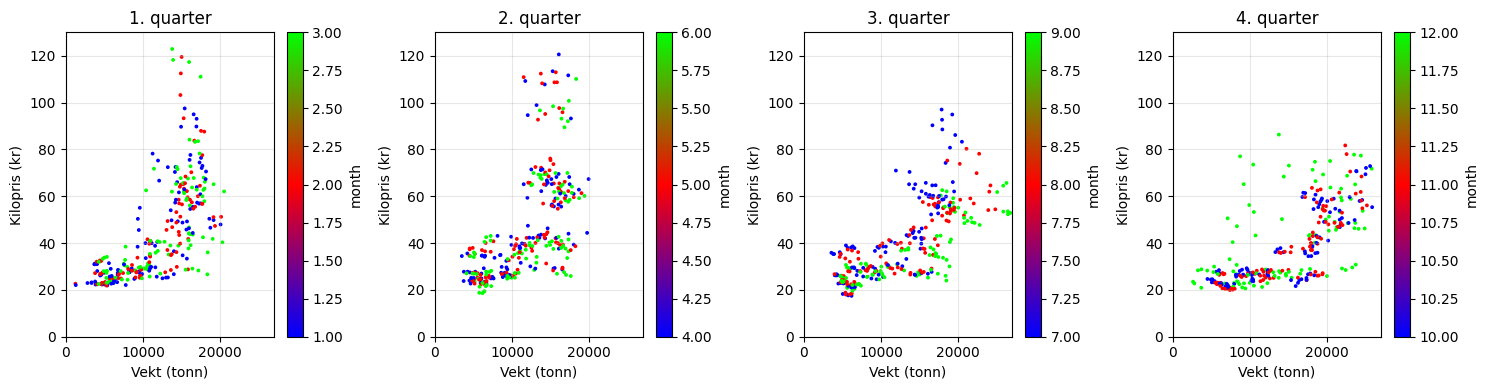

In [78]:
data['quarter'] = data.index.quarter
data['month'] = data.index.month

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

for i in range(4):
    selected = data.loc[data['quarter'] == i + 1]
    selected.plot(
        kind='scatter', 
        x='Vekt (tonn)', 
        y='Kilopris (kr)', 
        c='month', 
        cmap='brg', 
        s=3, 
        ax=axs[i]
    )

    axs[i].set_title(f'{i + 1}. quarter')
    axs[i].grid(alpha=0.3)
    axs[i].set_xlim((0, 27000))
    axs[i].set_ylim((0, 130))

fig.tight_layout()

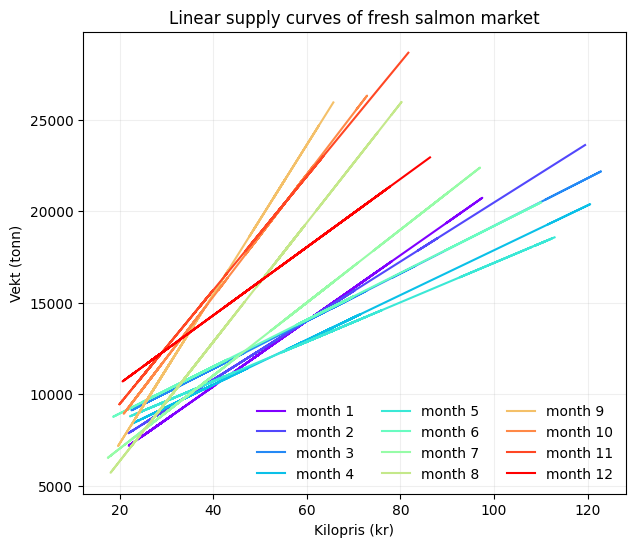

In [90]:

def linear_supply_curve(price, a, b):
    return a + b * price

colors = plt.cm.rainbow(np.linspace(0, 1, 12))

fig, ax = plt.subplots(figsize=(7, 6))

for i, month in enumerate(data['month'].unique()):
    selected = data.loc[data['month'] == month]
    params, covariance = curve_fit(linear_supply_curve, selected['Kilopris (kr)'], selected['Vekt (tonn)'])

    ax.plot(selected['Kilopris (kr)'], linear_supply_curve(selected['Kilopris (kr)'], *params), label=f'month {month}', color=colors[i])

ax.set_title('Linear supply curves of fresh salmon market')
ax.set_xlabel('Kilopris (kr)')
ax.set_ylabel('Vekt (tonn)')
ax.grid(alpha=0.2)
ax.legend(ncol=3, frameon=False);